# Credit Card Default Prediction

# Step 1: Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv.zip")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Step 2: EDR

In [3]:
pd.set_option('display.max_columns', None)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df = df.drop(["ID"] , axis=1)
df.shape

(30000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
df.describe(include="all")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
print(df.duplicated().sum())

35


In [8]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [9]:
df["SEX"].value_counts()

,count
SEX,
2,18091
1,11874


In [10]:
# Encode 'SEX' as categorical

df['SEX'] = df['SEX'].map({1: 'male', 2: 'female'}).astype("category")

In [11]:
df["EDUCATION"].value_counts()

,count
EDUCATION,
2,14019
1,10563
3,4915
5,280
4,123
6,51
0,14


In [12]:
# Encode 'EDUCATION' as categorical

edu_mapping = {1:"graduate_school" , 2:"university" , 3:"high_school" , 4:"others" , 5:"others" , 6:"others" , 0:"others"}

df['EDUCATION'] = df['EDUCATION'].map(edu_mapping).astype("category")

In [13]:
df["MARRIAGE"].value_counts()

,count
MARRIAGE,
2,15945
1,13643
3,323
0,54


In [14]:
# Encode 'MARRIAGE' as categorical

marriage_mapping = {1:"married" , 2:"single" , 3:np.nan , 0:np.nan}

df["MARRIAGE"] = df["MARRIAGE"].map(marriage_mapping).astype("category")

In [15]:
df["PAY_0"].value_counts().sort_index(ascending=True)

,count
PAY_0,
-2,2750
-1,5682
0,14737
1,3667
2,2666
3,322
4,76
5,26
6,11


In [16]:
# Mapped 'payment' status to ordinal scores (9=best, 0=worst); -2 => NaN for later imputation.

for col in ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]:
    df[col] = df[col].replace(-2 , np.nan)


mapping = {-1:9 , 0:8 , 1:7 , 2:6 , 3:5 , 4:4 , 5:3 , 6:2 , 7:1 , 8:0}

for col in ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]:
    df[col] = df[col].map(mapping).astype("Int32")

In [17]:
df["PAY_0"].value_counts().sort_index(ascending=True)

,count
PAY_0,
0,19
1,9
2,11
3,26
4,76
5,322
6,2666
7,3667
8,14737


In [18]:
df.sample(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
11030,20000.0,male,university,single,24,8,8,6,6,8,8,17196.0,20609.0,20654.0,19118.0,18104.0,19846.0,4007.0,700.0,0.0,1000.0,2000.0,800.0,1
13930,100000.0,female,university,single,34,7,<NA>,9,9,9,9,0.0,0.0,1531.0,0.0,1799.0,0.0,0.0,1531.0,4886.0,1799.0,0.0,0.0,0
28208,370000.0,female,university,single,38,8,8,8,8,8,8,75823.0,63617.0,65585.0,67223.0,62201.0,64356.0,5000.0,3000.0,3003.0,3000.0,3500.0,60000.0,0


In [19]:
def plot_and_percent(x , y , df):
  sns.barplot(data=df , x=x , y=y)
  plt.show()
  return (df.groupby(x)[y].mean().sort_values(ascending=False).mul(100).round(2).astype(str) + "%")

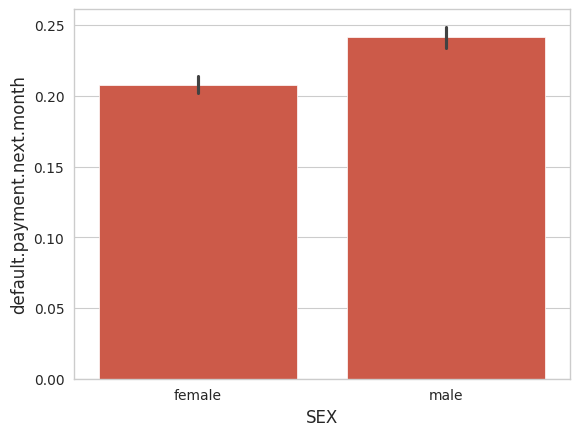

,default.payment.next.month
SEX,
male,24.16%
female,20.79%


In [20]:
plot_and_percent("SEX" , "default.payment.next.month" , df)

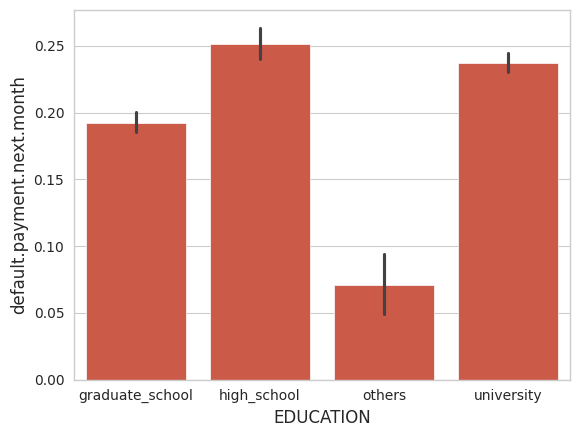

,default.payment.next.month
EDUCATION,
high_school,25.17%
university,23.74%
graduate_school,19.24%
others,7.05%


In [21]:
plot_and_percent("EDUCATION" , "default.payment.next.month" , df)

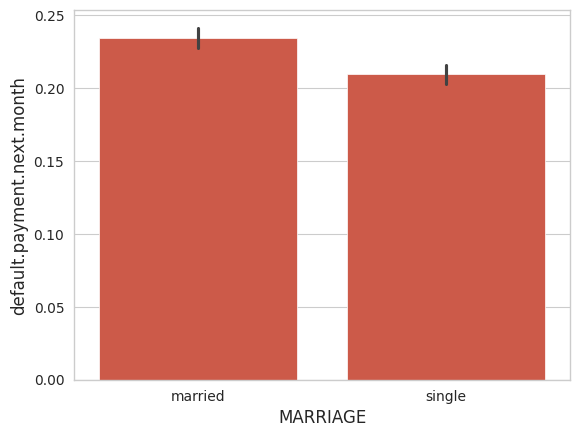

,default.payment.next.month
MARRIAGE,
married,23.46%
single,20.95%


In [22]:
plot_and_percent("MARRIAGE" , "default.payment.next.month" , df)

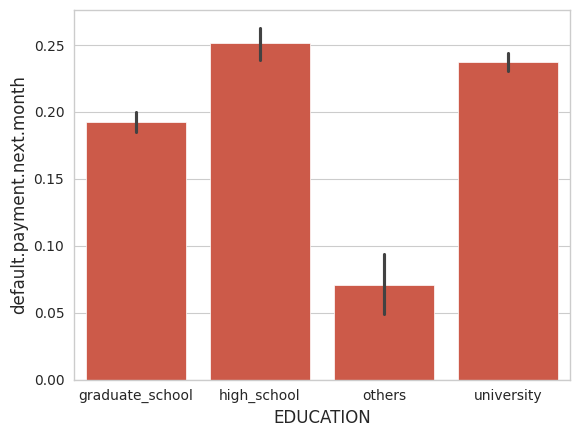

,default.payment.next.month
EDUCATION,
high_school,25.17%
university,23.74%
graduate_school,19.24%
others,7.05%


In [23]:
plot_and_percent("EDUCATION" , "default.payment.next.month" , df)

# Step 3: Train Test Split

In [24]:
x = df.drop(["default.payment.next.month"] , axis=1)
y = df["default.payment.next.month"]
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

In [26]:
def check_class_balance(y_train, y_test):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Train
    train_counts = pd.Series(y_train).value_counts(normalize=True) * 100
    axes[0].bar(train_counts.index.astype(str), train_counts.values)
    axes[0].set_title("Train Distribution (%)")
    for i, v in enumerate(train_counts.values):
        axes[0].text(i, v + 1, f"{v:.1f}%", ha="center")
    axes[0].set_ylim(0, max(train_counts.values) + 5)

    # Test
    test_counts = pd.Series(y_test).value_counts(normalize=True) * 100
    axes[1].bar(test_counts.index.astype(str), test_counts.values, color="orange")
    axes[1].set_title("Test Distribution (%)")
    for i, v in enumerate(test_counts.values):
        axes[1].text(i, v + 1, f"{v:.1f}%", ha="center")
    axes[1].set_ylim(0, max(test_counts.values) + 5)

    plt.show()



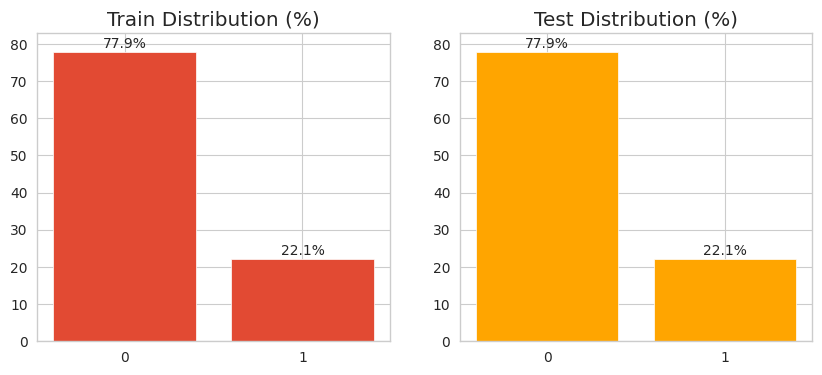

In [27]:
# Show balance

check_class_balance(y_train, y_test)

# Step 4: Missing Value Check




In [28]:
x_train.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,312
AGE,0
PAY_0,2167
PAY_2,2968
PAY_3,3217
PAY_4,3432
PAY_5,3605


# Step 5: Feature Engineering

In [29]:
x_train.sample(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28125,20000.0,female,university,married,43,7,6,8,8,8,8,17188.0,16619.0,17341.0,18352.0,18716.0,19109.0,0.0,1294.0,1305.0,669.0,694.0,697.0
11211,130000.0,male,university,single,26,6,6,8,8,8,8,134836.0,128038.0,126862.0,97925.0,100484.0,54125.0,0.0,5000.0,3500.0,4055.0,10000.0,50000.0
16742,20000.0,male,high_school,single,40,7,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Add 'age group' feature

for df_set in [x_train , x_test]:
    df_set["AgeGroup"] = pd.cut(
        df_set["AGE"] ,
        bins=[0 , 5 , 12 , 18 , 24 , 35 , 60 , np.inf] ,
        labels = ["Baby" , "Child" , "Teenager" , "Young Adult" , "Adult" , "Middle-Aged" , "Senior"]
    )
    df_set.drop("AGE" , axis=1 , inplace=True)
x_train.sample(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AgeGroup
13659,220000.0,female,university,single,8,8,8,8,8,9,57222.0,160712.0,210445.0,74138.0,1808.0,95818.0,107789.0,54539.0,1483.0,1808.0,94020.0,2581.0,Adult
12404,130000.0,female,university,single,8,8,8,8,8,8,80533.0,42126.0,44370.0,85115.0,69011.0,70460.0,1816.0,3060.0,69000.0,2578.0,2671.0,2888.0,Adult
16632,220000.0,male,university,single,8,8,8,6,9,9,6229.0,3516.0,7413.0,3697.0,3703.0,3500.0,1000.0,7397.0,0.0,3703.0,3500.0,3697.0,Adult


In [31]:
x_train["AgeGroup"].value_counts()

,count
AgeGroup,
Adult,11300
Middle-Aged,10314
Young Adult,2144
Senior,214
Teenager,0
Baby,0
Child,0


In [32]:
# add 'FullPayMonths' feature

pay_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
bill_cols = ["BILL_AMT1" , "BILL_AMT2" , "BILL_AMT3" , "BILL_AMT4" , "BILL_AMT5" , "BILL_AMT6"]

for df_set in [x_train , x_test]:
    df_set["FullPayMonths"] = ((df_set[pay_cols].values / (df_set[bill_cols].values + 1e-6)) >=1).sum(axis=1)
x_train.sample(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AgeGroup,FullPayMonths
7203,50000.0,male,university,married,8,8,8,8,8,8,47721.0,48993.0,50280.0,18762.0,18290.0,19165.0,2037.0,2324.0,1000.0,1000.0,1165.0,1596.0,Middle-Aged,0
21635,80000.0,female,university,single,7,6,6,6,6,6,21775.0,21127.0,23772.0,23092.0,24806.0,24272.0,0.0,3000.0,0.0,2100.0,0.0,1500.0,Young Adult,0
17428,130000.0,female,university,married,8,8,8,8,8,8,84963.0,83958.0,84906.0,85690.0,85892.0,87996.0,2980.0,4012.0,3885.0,3158.0,4704.0,3218.0,Adult,0


# Step 6: Encoding Categorical Variables

In [33]:
# 'AgeGroup' encoding

age_group_mapping = {
    "Baby": 0,
    "Child": 1,
    "Teenager": 2,
    "Young Adult": 3,
    "Adult": 4,
    "Middle-Aged": 5,
    "Senior": 6
}

for df_set in [x_train , x_test]:
    df_set["AgeGroup"] = df_set["AgeGroup"].map(age_group_mapping).astype("Int32")
x_train.sample(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AgeGroup,FullPayMonths
13298,200000.0,female,graduate_school,single,9,9,<NA>,9,9,9,92400.0,0.0,0.0,92384.0,13180.0,1194.0,0.0,0.0,92384.0,13196.0,1200.0,0.0,4,1
26250,210000.0,female,graduate_school,NaN,9,9,9,8,8,8,1332.0,3825.0,33515.0,78075.0,109374.0,108869.0,3848.0,33515.0,48075.0,39374.0,1000.0,1357.0,4,3
8894,90000.0,male,graduate_school,single,8,8,8,8,8,8,72774.0,67584.0,57985.0,56268.0,55970.0,56825.0,2900.0,2700.0,2200.0,2100.0,2200.0,2200.0,4,0


#Step 7: Correlation Analysis

In [34]:
def show_corr_between_feature_and_target(x_train , y_train):
     plt.figure(figsize=(9,8))
     c = pd.concat([x_train , y_train] , axis=1).corr(numeric_only=True)[y_train.name].abs().round(2).sort_values(ascending=False)
     sns.heatmap(c.to_frame() , annot=True , cmap="coolwarm")
     plt.show()

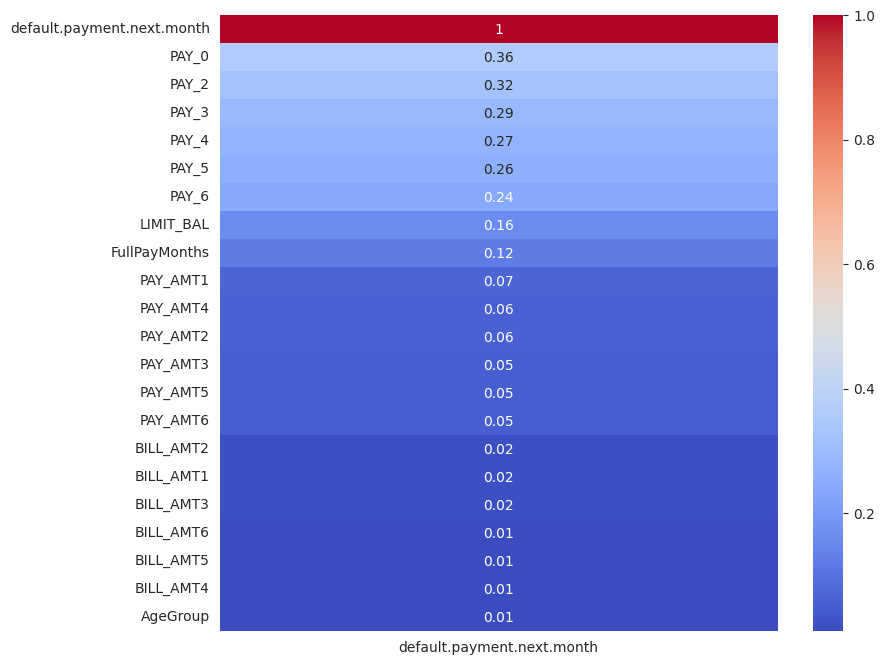

In [35]:
# corr between features & target

show_corr_between_feature_and_target(x_train , y_train);


# Step 8: Model Evaluate

In [36]:
! pip install xgboost --quiet

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Compute Class weight
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# Scaling on numeric only
num_cols = x_train.select_dtypes(include=np.number).columns
cat_cols = x_train.select_dtypes(exclude=np.number).columns

scaler = MinMaxScaler(feature_range=(0,1))
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

# XGB Model
xgb = XGBClassifier(
    max_depth=4,
    learning_rate=0.11102281342154667,
    n_estimators=211,
    subsample=0.520091547964983,
    colsample_bytree=0.7971253842954275,
    reg_alpha=0.8390827738181525,
    reg_lambda=0.8016327924065053,
    min_child_weight=38,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
    enable_categorical=True
)

# Fit
xgb.fit(x_train, y_train, sample_weight=sample_weights)

# probabilities
probs_train = xgb.predict_proba(x_train)[:, 1]
probs_test  = xgb.predict_proba(x_test)[:, 1]

# Apply best threshold
best_thr = 0.7183254736020876
final_preds_train = (probs_train >= best_thr).astype(int)
final_preds_test  = (probs_test >= best_thr).astype(int)
# F1 Score
f1_train  = f1_score(y_train, final_preds_train, average="weighted")
f1_test = f1_score(y_test, final_preds_test, average="weighted")

# Results
print(f"Train F1 Score: {f1_train:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Train F1 Score: 0.8178
Test F1 Score: 0.8093
